In [2]:
import pandas as pd
import numpy as np

<h4>Задача: Обработка и преобразование многостраничного документа excel в одностраничный докуменат определенного формата.</h4>

In [3]:
#Open and save documents all sheets to dict of DataFrame
details_in = pd.read_excel('Details.xlsx', sheet_name=None, header=None)

In [4]:
details_in[list(details_in.keys())[0]].head(5) #first 20 rows of first list incoming data

,0,1,2,3,4,5
0,Сolibri,Дверь,1 — Door,NaN,NaN,NaN
1,1,0V2627,Дверь Colibri,PORTA,102.578,NaN
2,3,251682,Лицевая панель Colibri,PANNELLO SELEZIONI FRONTALE C-5,28.308,NaN
3,5,0V2972,Крышка платы кнопок COLIBRI,CARD COVER,5.530,NaN
4,6,0V2535,Плата кнопок Colibri,SCHEDA INTERFACCIA,92.694,NaN


<h5>Документ состоит из нескольких страниц.
В каждой странице собраны входные данные по определенному изделию (автомату)</h5>
Задача:
<h5>1. Убрать из названий деталей (колонка №2 выше) все суффиксы относящиеся к названиям автоматов.
Например 'Colibri'.</h5>

Сложность в том, что эти суффиксы писались вручную и там произвольная форма обозначений.

Вот пример некоторых суффиксов (в скобочкаих и без, через пробел и нет, через слеш, через запитую и тд):

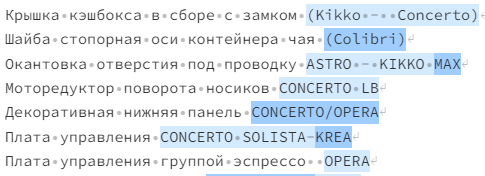

<h5>2. Собрать столбцы 'Автомат', 'Место установки'.</h5>
Автоматы всегда соответствуют ячейкам 0 / 0 в файле, места установки идут следующей записью.
Однако слоожность в том, что в ряде случаев места установки написаны с доп информацией которая не должна быть скопирована.
Пример:

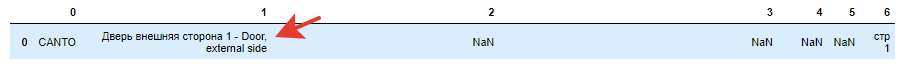


<h5>3. Собрать столбец "Имя" в формате [Старое имя столбец 2 без суффикса] [Название автомата] [Место установки].</h5>

<h5>4. Свести все листы в 1 сводную, без строк - разделителей</h5>

<h5>5. Переименовать и расположить столбцы по шаблону</h5>

<h5>6. Сохранить все в excel файл</h5>

In [5]:
details = details_in.copy() #make copy of set

In [7]:
automats = list(details_in.keys()) #lets see sheet names
automats

['Colibri',
 'Kikko ES6  IN7',
 'Kikko MAX  + Kikko MAX T0Go',
 'price',
 'TDSheet',
 '1.Concerto',
 '2.Canto',
 '3.Opera + Opera ToGo',
 '4.Colibri LB',
 '5.Kikko ES6 LB',
 '6.Cоncerto LB',
 '7.Canto LB',
 '8.Zenith LB',
 '9.Kikko RY',
 '10.Snekky XL',
 '11.Snekky Sl',
 '12.Snekky MAX',
 '13.Snekky RY',
 '14.Melodia',
 '15.Melodia Sl',
 '16.Jazz',
 '17.Samba',
 '18.Fas 900',
 '19.Fas 1050']

В входной информации есть лишние листы, которые не нужно обрабатывать  'price', 'TDSheet'. Исключаем их из списка обработки.

In [8]:
del automats[3:5] #del 3, 4 elements from list
automats

['Colibri',
 'Kikko ES6  IN7',
 'Kikko MAX  + Kikko MAX T0Go',
 '1.Concerto',
 '2.Canto',
 '3.Opera + Opera ToGo',
 '4.Colibri LB',
 '5.Kikko ES6 LB',
 '6.Cоncerto LB',
 '7.Canto LB',
 '8.Zenith LB',
 '9.Kikko RY',
 '10.Snekky XL',
 '11.Snekky Sl',
 '12.Snekky MAX',
 '13.Snekky RY',
 '14.Melodia',
 '15.Melodia Sl',
 '16.Jazz',
 '17.Samba',
 '18.Fas 900',
 '19.Fas 1050']

<h5>2. Сначала что попроще: Формируем колонку 'Автомат' из ячейки 0/0 для всех деталей. 
Формируем колонку "Место установки"</h5>

- Чтобы убрать лишнее из Место установки при беглом просмотре данных было выявлено, что нужные данные находятся либо перед словом (Page) либо перед паттерном 'цифра одна или несколько+пробел+тире длинное или короткое'
- Пишем регулярное выражение, которое найдет и разделит строку по этим 2 паттернам r'(Page)|(\d{1,} {1,}[-—])'
- Дальше заполняем пустые ячейки до первой не пустой через метод fillna с атрибутом ffill - 'заполнение вперед'
- Обрезаем случайные пробелы в конце строки через strip  

In [9]:
#make new columns for each sheets

for sheet in automats:
    
    #open df by sheet name
    work_df = details[sheet]
    
    #make 'Автомат' column from row = 0, column = 0
    work_df['Автомат'] = work_df[0][0]
    
    #make 'Место установки' column from column[1], where column[0] is equal column['Автомат']
    work_df['Место установки'] = work_df[1].where(work_df[0] == work_df['Автомат'], np.NaN)\
                                            .str.split(r'(Page)|(\d{1,} {1,}[-—])', regex=True)\
                                            .fillna(method='ffill')\
                                            .map(lambda x: x[0].strip())
    #split by regex pattern 'Page' or like '5 -', take first part of list

    

<h5>Результат обработки:</h5>

In [10]:
details_in[list(details_in.keys())[0]].head(5)

,0,1,2,3,4,5,Автомат,Место установки
0,Сolibri,Дверь,1 — Door,NaN,NaN,NaN,Сolibri,Дверь
1,1,0V2627,Дверь Colibri,PORTA,102.578,NaN,Сolibri,Дверь
2,3,251682,Лицевая панель Colibri,PANNELLO SELEZIONI FRONTALE C-5,28.308,NaN,Сolibri,Дверь
3,5,0V2972,Крышка платы кнопок COLIBRI,CARD COVER,5.530,NaN,Сolibri,Дверь
4,6,0V2535,Плата кнопок Colibri,SCHEDA INTERFACCIA,92.694,NaN,Сolibri,Дверь


<h5>1. Теперь посложнее: Вырезаем из названий деталей суффиксы ассоциированные с называнием автоматов</h5>

Делать это будем через регулярные выражения.

- Просматриваем данные, замечаем что:

  1.Суффиксы на латинице 3 и больше символов, из 1 или несколько слов через разделитель
  
  2.Суффиксы начинаются с скобки или пробела
  
  3.Завершаются скобкой пробелом и или рядом цифр
  
- Разрабатываем регулярное выражение которое поймает этот паттерн:
  
  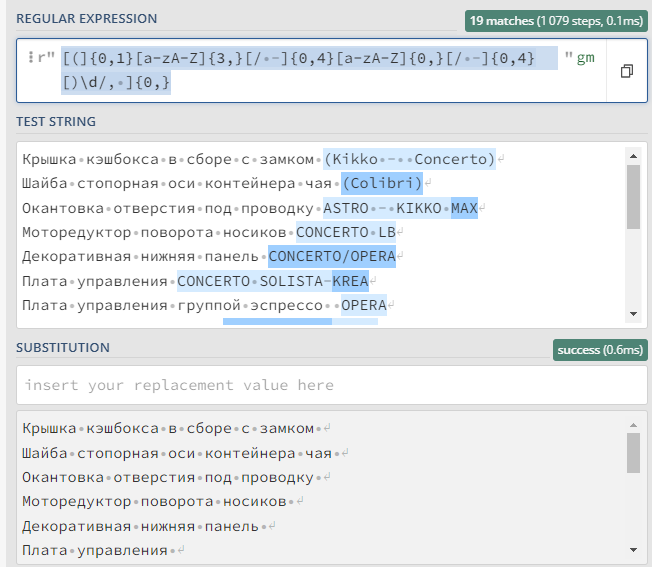
  
- Проходимся по названиям и меняем паттерн на '' через метод replace pandas 

In [11]:
#clean column[2] from automat names

reg1 = r'[(]{0,1}[a-zA-Z]{4,}[/ -]{0,4}[a-zA-Z]{0,}[/ -]{0,4}[)\d/, ]{0,}' #find all english names also like 'abcd - ndfs'
reg2 = r'[(]{0,1}[a-zA-Z]{3,}[/ -]{0,4}[a-zA-Z]{0,}[/ -]{0,4}[)\d/, ]{0,}' #for FAS

for sheet in automats:     
    #open df by sheet name
    work_df = details[sheet]
    
    if sheet not in (automats[-2:]):
        #make 'Автомат' column from row = 0, column = 0
        work_df[2] = work_df[2].replace(reg1, value='', regex=True).str.strip()
    else:
        #make 'Автомат' column from row = 0, column = 0
        work_df[2] = work_df[2].replace(reg2, value='', regex=True).str.strip()
    

In [12]:
details_in[list(details_in.keys())[0]].head(7) #lets see result

,0,1,2,3,4,5,Автомат,Место установки
0,Сolibri,Дверь,1 —,NaN,NaN,NaN,Сolibri,Дверь
1,1,0V2627,Дверь,PORTA,102.578,NaN,Сolibri,Дверь
2,3,251682,Лицевая панель,PANNELLO SELEZIONI FRONTALE C-5,28.308,NaN,Сolibri,Дверь
3,5,0V2972,Крышка платы кнопок,CARD COVER,5.530,NaN,Сolibri,Дверь
4,6,0V2535,Плата кнопок,SCHEDA INTERFACCIA,92.694,NaN,Сolibri,Дверь
5,7,0V2534,Суппорт кнопок,SUPPORTO SCHEDA,7.056,NaN,Сolibri,Дверь
6,9,0V2567,Стеклышко этикетки,VETRINO TARGHETTA,2.842,NaN,Сolibri,Дверь


<h5>Сформируем итоговую колонку соединив значения в нужном порядке и очистим таблицу от строк - разделителей убрав строки с пустыми ячейками в имени (столбец 3)

In [13]:
#make result column

for sheet in automats:     
    #open df by sheet name
    work_df = details[sheet]
    work_df['Соединенная'] = work_df[2] + ' ' + work_df['Автомат'] + ' (' + work_df['Место установки'] + ')'
    work_df.dropna(subset=[3], inplace=True)


In [14]:
details[automats[-1]].head(3)

,0,1,2,3,4,5,6,Автомат,Место установки,Соединенная
1,2,820437,Комплект ножек,COMPLETE FOOT WITH ANTISLIP BASE,13.538,NaN,NaN,Fas 1050,Корпус,Комплект ножек Fas 1050 (Корпус)
2,3,720488,Опора двери подъёмная,DOOR SLIDEBRACKET,10.542,NaN,NaN,Fas 1050,Корпус,Опора двери подъёмная Fas 1050 (Корпус)
3,4,855416,Решётка нижняя декоративная,LEG COVER 1050 RAL7021,37.926,NaN,NaN,Fas 1050,Корпус,Решётка нижняя декоративная Fas 1050 (Корпус)


<h5>Сохраним многостраничный документ для промежуточного просмотра

In [15]:
writer = pd.ExcelWriter('test.xlsx', engine='xlsxwriter')

In [16]:
for sheet_name in automats:
    details[sheet_name].to_excel(writer, sheet_name=sheet_name, index=False, header=False)
writer.save()

<h5>Соединим все обработанные листы в 1 таблицу, попутно считая сумму строк из каждого листа в переменную counter (для проверки)

In [17]:
#save all data in one

result_df = pd.DataFrame()
counter = 0

for sheet_name in automats:
    counter += details[sheet_name].shape[0]
    result_df = pd.concat([result_df, details[sheet_name]])

result_df.head()

,0,1,2,3,4,5,Автомат,Место установки,Соединенная,6
1,1,0V2627,Дверь,PORTA,102.578,NaN,Сolibri,Дверь,Дверь Сolibri (Дверь),NaN
2,3,251682,Лицевая панель,PANNELLO SELEZIONI FRONTALE C-5,28.308,NaN,Сolibri,Дверь,Лицевая панель Сolibri (Дверь),NaN
3,5,0V2972,Крышка платы кнопок,CARD COVER,5.530,NaN,Сolibri,Дверь,Крышка платы кнопок Сolibri (Дверь),NaN
4,6,0V2535,Плата кнопок,SCHEDA INTERFACCIA,92.694,NaN,Сolibri,Дверь,Плата кнопок Сolibri (Дверь),NaN
5,7,0V2534,Суппорт кнопок,SUPPORTO SCHEDA,7.056,NaN,Сolibri,Дверь,Суппорт кнопок Сolibri (Дверь),NaN


In [27]:
counter

5351

In [28]:
result_df.shape[0]

5351

Проверили, что количество итоговых строк равно сумме всех строк листов

<h5> Дальше переименовываем и располагаем стобцы в соответствии с требуемым шаблоном

In [30]:
result_df.rename(columns = {0: 'Индекс запчасти', 
                            1: 'Артикул',
                            'Соединенная': 'Название', 
                            4: 'Базовая цена (Тип цены "Розничная цена"):',
                           5: 'Валюта базовой цены', 
                            6: '1 уровень', 'Автомат': '2 уровень', 
                            'Место установки': '3 уровень'}, inplace=True)

In [31]:
result_df.columns.to_list()

['Индекс запчасти',
 'Артикул',
 2,
 3,
 'Базовая цена (Тип цены "Розничная цена"):',
 'Валюта базовой цены',
 '2 уровень',
 '3 уровень',
 'Название',
 '1 уровень']

In [32]:
result_df = result_df.reindex(columns = ['Индекс запчасти', 'Артикул', 'Название', 
                               'Базовая цена (Тип цены "Розничная цена"):', 'Валюта базовой цены', 
                               '1 уровень', '2 уровень', '3 уровень'])

In [33]:
result_df['1 уровень'] = 'Запчасти и ремонт'
result_df['Валюта базовой цены'] = 'EUR'

In [34]:
result_df.head()

,Индекс запчасти,Артикул,Название,"Базовая цена (Тип цены ""Розничная цена""):",Валюта базовой цены,1 уровень,2 уровень,3 уровень
1,1,0V2627,Дверь Сolibri (Дверь),102.578,EUR,Запчасти и ремонт,Сolibri,Дверь
2,3,251682,Лицевая панель Сolibri (Дверь),28.308,EUR,Запчасти и ремонт,Сolibri,Дверь
3,5,0V2972,Крышка платы кнопок Сolibri (Дверь),5.530,EUR,Запчасти и ремонт,Сolibri,Дверь
4,6,0V2535,Плата кнопок Сolibri (Дверь),92.694,EUR,Запчасти и ремонт,Сolibri,Дверь
5,7,0V2534,Суппорт кнопок Сolibri (Дверь),7.056,EUR,Запчасти и ремонт,Сolibri,Дверь


<h5> Пишем в файл

In [179]:
result_df.to_excel('Итоговая таблица автоматов_2.xlsx', index=False)

<h5> Итоговый файл перед загрузкой на сайт в любом случае вычитывается и проверяется на корректность. По итогу обработки были выявлены ошибки обработки из-за необычных названий мест установки (при обрезании названия не нашелся нужный паттерн).
    Ошибки были примерно в 150 строках из 5351 (менее 3%) и легко исправлены стандартными средствами замены excel